In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    

In [2]:
df = pd.read_csv("/kaggle/input/environmental-sensor-data-132k/iot_telemetry_data.csv")

In [3]:
df.head(5)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [4]:
df = df[['temp',"smoke","humidity"]]

# **sensor data anomaly detection**

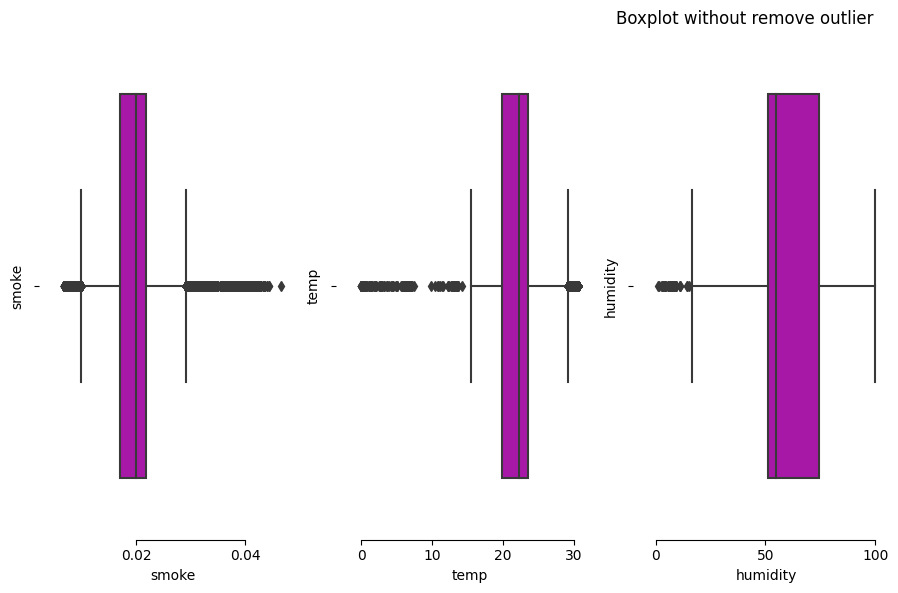

In [5]:
plt.figure(figsize=(15,6))
for i,name in enumerate(df[["smoke","temp","humidity"]].columns):
    plt.subplot(1,5,i+1)
    sns.boxplot(x=df[name],palette=["m", "g"])
    sns.despine(offset=10, trim=True)
    plt.ylabel(name)

plt.suptitle("Boxplot without remove outlier")
plt.tight_layout()
plt.show()

In [6]:
for col_name in df.columns:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr 
    high = q3+1.5*iqr 
    df = df[df[col_name]>=low]
    df = df[df[col_name]<=high]

temp
smoke
humidity


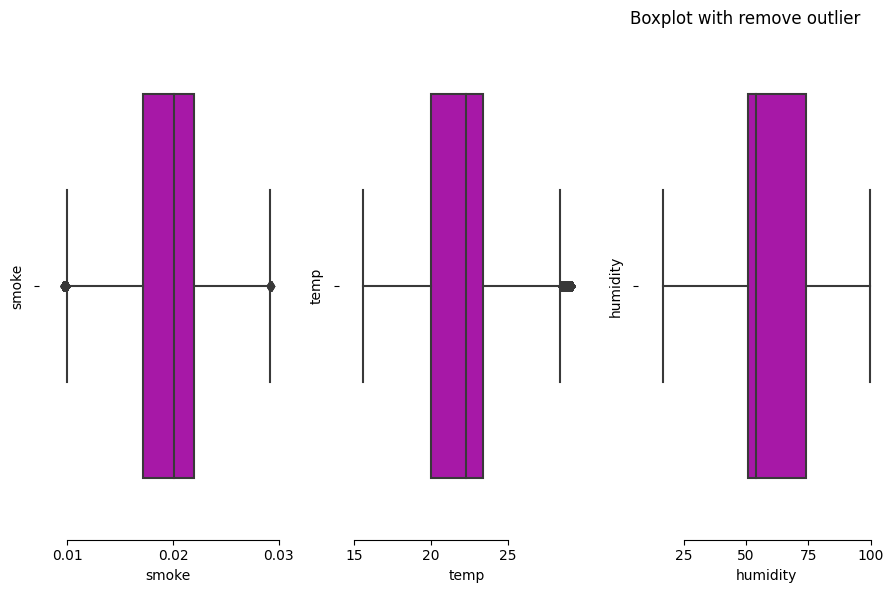

In [7]:
plt.figure(figsize=(15,6))
for i,name in enumerate(df[["smoke","temp","humidity"]].columns):
    plt.subplot(1,5,i+1)
    sns.boxplot(x=df[name],palette=["m", "g"])
    sns.despine(offset=10, trim=True)
    plt.ylabel(name)

plt.suptitle("Boxplot with remove outlier")
plt.tight_layout()
plt.show()

In [8]:
y = df['humidity']
x = df[['temp',"smoke"]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [10]:
l_r = LinearRegression()
l_r.fit(X_train, y_train)


LinearRegression()

In [11]:
l_r.score(X_test,y_test)

0.6375432704890593

In [12]:
l_r.coef_

array([-1.34373614e+00, -2.19980885e+03])

In [13]:
l_r.intercept_

133.04486561723618

In [14]:
# main formula is {(-1.2504109682152187 * temp) + (-1989.4947530261543 * smoke) + 126.70601295195848}